Sample Rate: 20000 | bins: 20 | n_fft: 2048 | hop: 1024 | freq (9.765625 - 10000.0)hz
30001
Not wav: txt | audioMNIST_meta.txt
30000
30000
torch.Size([1, 50000])
torch.Size([1, 20, 21])


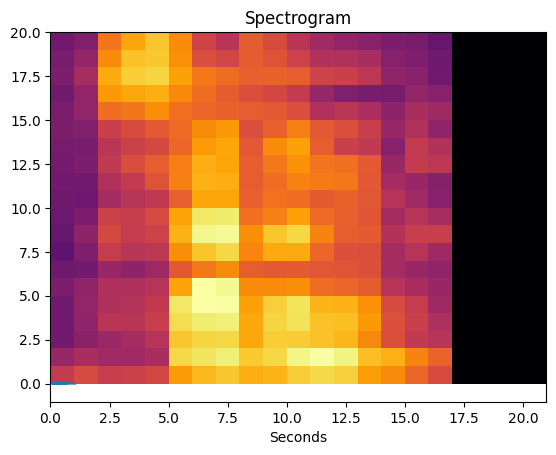

In [1]:
import torch.nn as nn
from tools.AudioSettings import AudioSettings
from tools.AudioMnistDataset import AudioMnistDataset
from tools.transforms import PrepPipeline
from tools.visualizers import plot_audio_channel, plot_spectrogram
from torch.utils.data import random_split, DataLoader
from tools.train import train, HyperParams
from torchsummary import summary

settings = AudioSettings(sample_rate=20000, spectrogram_time_step=0.04, melspec_bins=20)
print(settings)
data = AudioMnistDataset('/Users/spensersaling/Documents/learning/ml/audio_mnist/AudioMNIST/data', settings, num_samples=50000)
print(len(data))
prepPipeline = PrepPipeline(settings, data[0][1])

example = data[0]
print(example[0].shape)
plot_audio_channel(example[0][0], example[1])
features = prepPipeline(example[0])
print(features.shape)
plot_spectrogram(features[0])

numTrain = 2000
numTest = 500
trainData, testData, remainder = random_split(data, (numTrain, numTest, 30000 - numTrain - numTest))

train_loader = DataLoader(trainData, batch_size=256)
test_loader = DataLoader(testData, batch_size=256)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       Spectrogram-1          [-1, 1, 1025, 21]               0
          MelScale-2            [-1, 1, 20, 21]               0
    MelSpectrogram-3            [-1, 1, 20, 21]               0
      PrepPipeline-4            [-1, 1, 20, 21]               0
           Flatten-5                  [-1, 420]               0
            Linear-6                  [-1, 100]          42,100
              ReLU-7                  [-1, 100]               0
            Linear-8                   [-1, 50]           5,050
              ReLU-9                   [-1, 50]               0
           Linear-10                   [-1, 10]             510
Total params: 47,660
Trainable params: 47,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.18
Params size (MB): 0.18
Estimated Tot

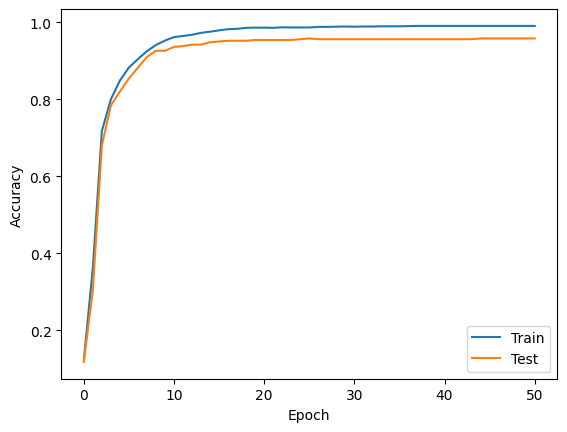

In [2]:
n_mels = features.shape[1]
n_frames = features.shape[2]

h = [100, 50]

model = nn.Sequential( 
    PrepPipeline(settings, data[0][1]),
    nn.Flatten(),
    nn.Linear(n_mels * n_frames, h[0]),
    nn.ReLU(),
    nn.Linear(h[0], h[1]),
    nn.ReLU(),
    nn.Linear(h[1], 10)
)

summary(model, (1, 50000))

train(model, train_loader, test_loader, HyperParams(epochs=50, lr_init=0.01, lr_decay=0.9))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       Spectrogram-1          [-1, 1, 1025, 21]               0
          MelScale-2            [-1, 1, 20, 21]               0
    MelSpectrogram-3            [-1, 1, 20, 21]               0
      PrepPipeline-4            [-1, 1, 20, 21]               0
            Conv2d-5            [-1, 4, 18, 19]              40
              ReLU-6            [-1, 4, 18, 19]               0
         MaxPool2d-7              [-1, 4, 9, 9]               0
            Conv2d-8              [-1, 8, 7, 7]             296
              ReLU-9              [-1, 8, 7, 7]               0
           Conv2d-10             [-1, 16, 5, 5]           1,168
             ReLU-11             [-1, 16, 5, 5]               0
           Conv2d-12             [-1, 32, 3, 3]           4,640
             ReLU-13             [-1, 32, 3, 3]               0
           Conv2d-14             [-1, 6

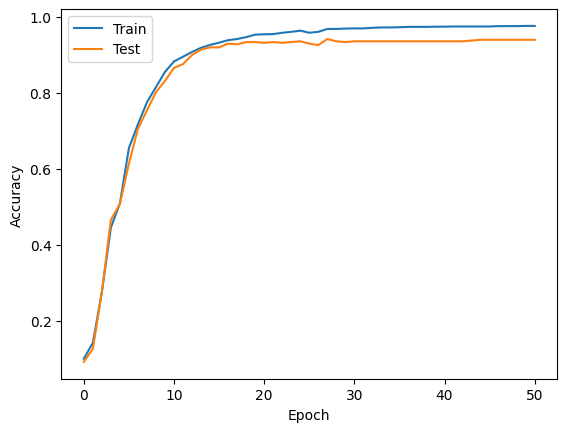

In [3]:
model = nn.Sequential(
    PrepPipeline(settings, data[0][1]), # m x 1 x 20 x 21
    nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=0), # 18 x 19 x 8
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # 9 x 9 x 8
    nn.Conv2d(4, 8, 3), # 7 x 7 x 4,
    nn.ReLU(),
    nn.Conv2d(8, 16, 3), # 5 x 5 x 8,
    nn.ReLU(),
    nn.Conv2d(16, 32, 3), # 3 x 3 x 16,
    nn.ReLU(),
    nn.Conv2d(32, 64, 3), # 1 x 1 x 32,
    nn.ReLU(),

    nn.Flatten(),
    nn.Linear(64, 10)
)

summary(model, (1,  50000))

train(model, train_loader, test_loader, HyperParams(epochs=50, lr_init=0.01, lr_decay=0.9))

----- Initialized model performance:
Train 7.40% | Test 6.40%

----- Trained Model Performance:
Epoch: 1 | lr: 0.01
Train 12.90% | Test 10.40%
Time: 1.8s

Epoch: 2 | lr: 0.009
Train 17.30% | Test 13.00%
Time: 1.8s

Epoch: 3 | lr: 0.0081
Train 31.90% | Test 30.00%
Time: 1.8s

Epoch: 4 | lr: 0.00729
Train 50.80% | Test 52.00%
Time: 1.8s

Epoch: 5 | lr: 0.00656
Train 72.30% | Test 72.80%
Time: 1.8s

Epoch: 6 | lr: 0.0059
Train 84.25% | Test 83.80%
Time: 1.8s

Epoch: 7 | lr: 0.00531
Train 88.90% | Test 86.20%
Time: 1.9s

Epoch: 8 | lr: 0.00478
Train 92.50% | Test 89.80%
Time: 1.8s

Epoch: 9 | lr: 0.0043
Train 94.85% | Test 94.00%
Time: 1.9s

Epoch: 10 | lr: 0.00387
Train 93.50% | Test 91.60%
Time: 1.8s

Epoch: 11 | lr: 0.00349
Train 95.30% | Test 92.40%
Time: 1.8s

Epoch: 12 | lr: 0.00314
Train 97.25% | Test 94.80%
Time: 1.8s

Epoch: 13 | lr: 0.00282
Train 97.55% | Test 96.00%
Time: 1.9s

Epoch: 14 | lr: 0.00254
Train 98.00% | Test 95.40%
Time: 1.9s

Epoch: 15 | lr: 0.00229
Train 97.20% | 

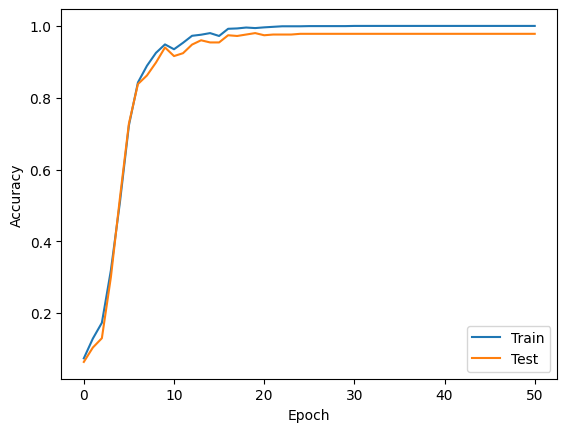

In [6]:
HIDDEN = 300
LAYERS = 1

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.prep_pipeline = PrepPipeline(settings, data[0][1])
        self.gru = nn.GRU(input_size=20, hidden_size=HIDDEN, num_layers=LAYERS, batch_first=True, dropout=0, bidirectional=False)
        self.linear = nn.Linear(HIDDEN, 10)

    def forward(self, x):
        x = self.prep_pipeline(x)
        x = x.squeeze()
        x = x.permute(0, 2, 1)
        x = self.gru(x)
        x = x[0] # discard the 2nd element of the tuple (the final hidden state)
        x = x[:, -1, :]
        x = self.linear(x)
        return x

model = Net()

# summary(model, (1,  50000))

train(model, train_loader, test_loader, HyperParams(epochs=50, lr_init=0.01, lr_decay=0.9, weight_decay=0))